In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


# Project : 인공지능과 가위바위보하기

In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

* train set은 제 사진 300장을 포함한 1500장의 사진을 사용했습니다.
* test set은 300장의 사진을 사용했습니다.

In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
500  images to be resized.
500  images resized.


In [6]:
import numpy as np

def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


라벨:  0


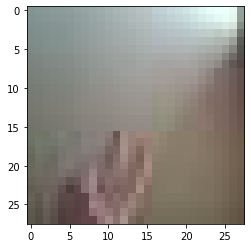

In [7]:
import matplotlib.pyplot as plt
import os

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델 정의하기

* 오버피팅 극복을 위해 Dropout layer를 추가하였습니다.

* 성능 향상을 위해 BatchNormalization layer를 추가하였습니다. 

In [8]:
from tensorflow import keras
import numpy as np

n_channel_1=15
n_channel_2=16
n_channel_3=26
n_dense=40
n_train_epoch=50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 15)        420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 15)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)


Epoch 1/10
47/47 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.8187
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8360
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8527
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8773
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2907 - accuracy: 0.8867
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8760
Epoch 10/10
47/47 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.9027


In [13]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(test_image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(test_image_dir_path)

print("바위 이미지 resize 완료!")



# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(test_image_dir_path)

print("보 이미지 resize 완료!")


test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_image_dir_path, 323)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.


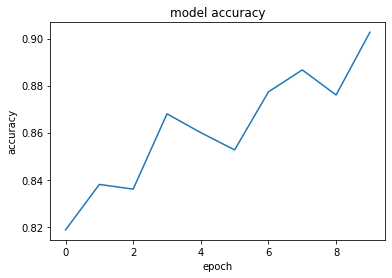

In [15]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

11/11 - 0s - loss: 0.7924 - accuracy: 0.6471
test_loss: 0.7924138307571411 
test_accuracy: 0.6470588445663452


* test accuracy가 약 0.647로 60% 이상을 달성하였습니다.

### 회고

* test accuracy가 60%이상 도달하게 하기 위해서 30번도 넘게 실험을 한 것 같습니다. 
* 이를 극복하기 위해 더 많은 층을 추가하여 쌓았고, 데이터셋의 개수를 늘려보니 목표이상의 정확도를 얻을 수 있었습니다.
* 아직도 하이퍼파라미터 튜닝이 익숙하지 않습니다. 그리디 알고리즘처럼 많은 실험을 해서 결과를 얻어냈는데 생각보다 시간이 오래걸리고 힘들었습니다... 더 연습하다보면 괜찮아질 날이 오겠지요?? ㅎㅎ